# IDC Classification

## Table of Contents

     1. Business Understanding
     2. Data Acquisition
     3. Exploratory Data Analysis
     4. Modelling
     5. Model Evaluation
     6. Deployment

**Note:**

Business Understanding and Data Acquisition are in Part 1 - IDC Classification - CNN notebook. 

Exploratory Data Analysis, Modelling, Model Evaluation and Deployment are in Part 2 - IDC Classification - CNN notebook. 

## 1. Business Understanding

**Goal:** To detect the cancer:

Here, Invasive Ductal Carcinoma (IDC) indicates presence of cancer. 

**Dataset:** The dataset (the breast cancer histology image dataset) from Biomedcentral and Kaggle. This dataset holds 2,77,524 patches of size 50×50 extracted from 162 whole mount slide images of breast cancer specimens scanned at 40x. Of these, 1,98,738 test negative and 78,786 test positive with IDC.

Filenames in this dataset looks like the below:

8913_idx5_x751_y1701_class1

Here, 8913_idx5 is the patient ID, 751 and 1701 are the x- and y- coordinates of the crop, and 1 is the class label (1 denotes presence of IDC).



### Data Source

https://www.kaggle.com/paultimothymooney/breast-histopathology-images

https://bmcresnotes.biomedcentral.com/articles/10.1186/s13104-019-4121-7

https://data.mendeley.com/datasets/w7jjcx7gj6/1

## 2. Data Acquisition

### Importing the Libraries

Let's begin by importing the libraries. 

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import os
from glob import glob

import os
import imageio
import skimage
import skimage.io
import skimage.transform

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import shutil
import matplotlib.pyplot as plt

from matplotlib.pyplot import imread # This will allow us to read the image files directly

In [2]:
# Master folder that contains the downloaded images
data_dir = r'C:\Users\user1\Desktop\WIP\IDC_regular_ps50_idx5'

Here, our data is not in the right format. All the images are in the a folder denoted by patient and there are mutiple sub-folders denoted by the class. Please see below:

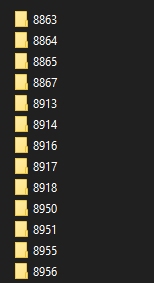

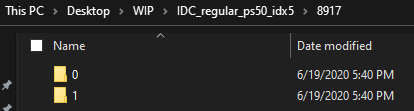

We will have to perform the following to have a standard structure:

1. Create a folder called "all_images_dir".
2. Move the images from "IDC_regular_ps50_idx5 folder" to "all_images_dir". 
3. Balancing the Dataset
4. Create a new folder called "base_dir" and train/test sub-folders within "base_dir". 
5. Move the images from "all_images_dir" to "base_dir". 

### Create a folder called "all_images_dir"

In [3]:
# Defining the above directory
patients = os.listdir(data_dir)

In [4]:
# Length of the patients
len(patients)

279

In [6]:
# Creating a new master folder
all_images_dir = 'all_images_dir'

os.mkdir(all_images_dir)

In [71]:
# # Creating a folder for non_idc images
non_idc = 'non_idc'

os.mkdir(non_idc)

In [73]:
# Creating a folder for idc images
idc = 'idc'

os.mkdir(idc)

In [7]:
# Contents in the folder
!ls

Capstone Project.ipynb
IDC_regular_ps50_idx5
all_images_dir
idc
non_idc


### Move the images from "IDC_regular_ps50_idx5 folder" to "all_images_dir"

In [8]:
# Creating a patient list
patient_list = os.listdir(data_dir)

In [9]:
# Moving all the images to all_images_dir
for patient in patient_list:
    
    path_0 = data_dir + '\\' + str(patient) + '\\0'
    path_1 = data_dir + '\\' + str(patient) + '\\1'


    # create a list of all files in folder 0
    file_list_0 = os.listdir(path_0)
    # create a list of list all file in folder 1
    file_list_1 = os.listdir(path_1)

    # move the 0 images to all_images_dir
    for fname in file_list_0:

        # source path to image
        src = os.path.join(path_0, fname)
        # destination path to image
        dst = os.path.join(all_images_dir, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)


    # move the 1 images to all_images_dir
    for fname in file_list_1:

        # source path to image
        src = os.path.join(path_1, fname)
        # destination path to image
        dst = os.path.join(all_images_dir, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

In [75]:
# Creating a folder for non-idc images 
for patient in patient_list:
    
    path_0 = data_dir + '\\' + str(patient) + '\\0'
    
    file_list_0 = os.listdir(path_0)
    
    for fname in file_list_0:

        # source path to image
        src = os.path.join(path_0, fname)
        # destination path to image
        dst = os.path.join(non_idc, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

In [76]:
# Creating a folder for idc images 
for patient in patient_list:
    
    path_1 = data_dir + '\\' + str(patient) + '\\1'

    # create a list of list all file in folder 1
    file_list_1 = os.listdir(path_1)

    # move the 1 images to all_images_dir
    for fname in file_list_1:

        # source path to image
        src = os.path.join(path_1, fname)
        # destination path to image
        dst = os.path.join(idc, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

In [20]:
# Number of images in the non-idc folder
len(os.listdir(non_idc))

198738

In [21]:
# Number of images in the idc folder
len(os.listdir(idc))

78786

In [14]:
# Checking sample filename
os.listdir(idc)[0]

'10253_idx5_x501_y351_class1.png'

In [16]:
# Number of images in the 'all_images_dir'
len(os.listdir('all_images_dir'))

277524

In [17]:
# Creating a list of images
image_list = os.listdir('all_images_dir')

In [18]:
# Verify the number of images again
len(image_list)

277524

Now, let's create a dataframe using image_list. We will use the dataframe for class distribution and creating train/test folders.

In [19]:
# Creating a dataframe
df = pd.DataFrame(image_list, columns = ['image_id'])

In [20]:
# Displaying top 5 rows
df.head()

,image_id
0,10253_idx5_x1001_y1001_class0.png
1,10253_idx5_x1001_y1051_class0.png
2,10253_idx5_x1001_y1101_class0.png
3,10253_idx5_x1001_y1151_class0.png
4,10253_idx5_x1001_y1201_class0.png


We will create 2 helper functions to extract patient id and target class. 

In [21]:
# Helper Function to extract patient id

def extract_patient_id(x):
    a = x.split('_')
    patient_id = a[0]
    return patient_id

In [22]:
# Helper Function to create target class 

def extract_target(x):
    a = x.split('_')
    b = a[4]
    target = b[5]
    return target

In [23]:
# Applying the above to the dataframe 

df['patient_id'] = df['image_id'].apply(extract_patient_id)

df['target'] = df['image_id'].apply(extract_target)

In [24]:
# Displaying the updated dataframe
df.head()

,image_id,patient_id,target
0,10253_idx5_x1001_y1001_class0.png,10253,0
1,10253_idx5_x1001_y1051_class0.png,10253,0
2,10253_idx5_x1001_y1101_class0.png,10253,0
3,10253_idx5_x1001_y1151_class0.png,10253,0
4,10253_idx5_x1001_y1201_class0.png,10253,0


In [25]:
# Let's check the shape of the dataframe
df.shape

(277524, 3)

In [26]:
# Import cv2
import cv2

In [28]:
# Let's create a function to display images in the all_images_dir folder
def draw_category_images(col_name,figure_cols, df, IMAGE_PATH):
     categories = (df.groupby([col_name])[col_name].nunique()).index
     f, ax = plt.subplots(nrows=len(categories),ncols=figure_cols, 
                         figsize=(4*figure_cols,4*len(categories))) # adjust size here
    # draw a number of images for each location
     for i, cat in enumerate(categories):
        sample = df[df[col_name]==cat].sample(figure_cols) # figure_cols is also the sample size
        for j in range(0,figure_cols):
            file=IMAGE_PATH + sample.iloc[j]['image_id']
            im=cv2.imread(file)
            ax[i, j].imshow(im, resample=True, cmap='gray')
            ax[i, j].set_title(cat, fontsize=16)  
     plt.tight_layout()
     plt.show()

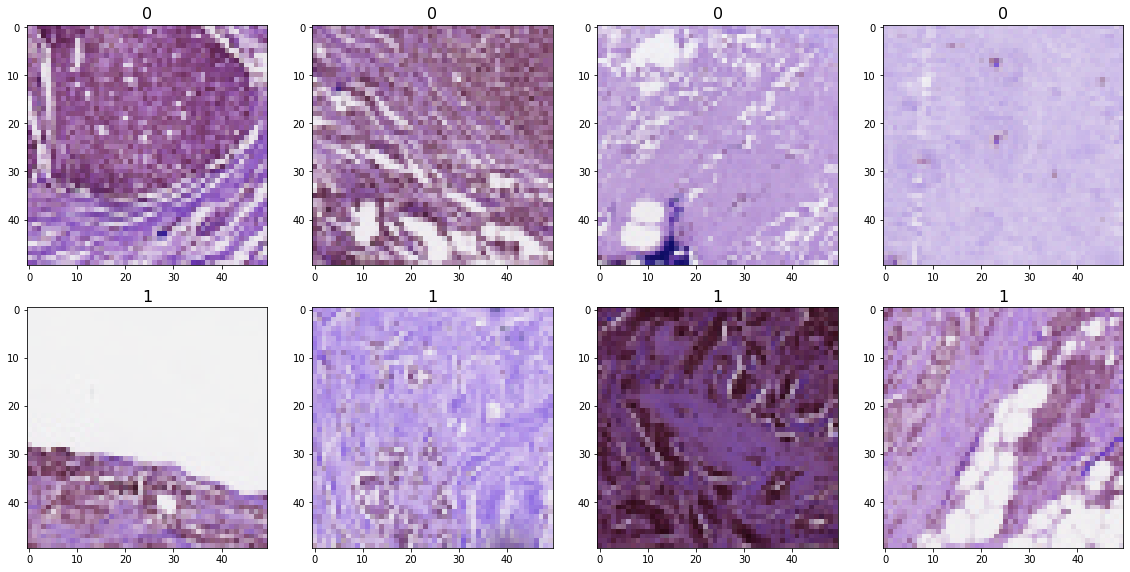

In [29]:
# Visualization
image_path = 'all_images_dir/'

draw_category_images('target',4, df, image_path)

### Balancing the Dataset

Let's start with checking the class distribution. 

In [30]:
# Let's check the class distribution
df['target'].value_counts()

0    198738
1     78786
Name: target, dtype: int64

We will now perform undersampling to match the size of minority class i.e. 78786. 

In [31]:
# Sample of the majority class

df_0 = df[df['target'] == '0'].sample(78786, random_state = 101)

In [32]:
# Sample of the minority class

df_1 = df[df['target'] == '1'].sample(78786, random_state = 101)

In [33]:
# Concatenate the 2 dataframes

df = pd.concat([df_0, df_1], axis = 0).reset_index(drop = True)

In [34]:
# Let's check the class distribution again

df['target'].value_counts()

0    78786
1    78786
Name: target, dtype: int64

In [35]:
# Creating Train and Test sets

y = df['target']

df_train, df_test = train_test_split(df, test_size = 0.10, random_state = 101, stratify = y)

In [36]:
print(df_train.shape)

(141814, 3)


In [37]:
print(df_test.shape)

(15758, 3)


### Create a new folder called "base_dir" and train/test sub-folders within "base_dir"

In [38]:
# Creating base_dir
base_dir = 'base_dir'
os.mkdir(base_dir)

In [39]:
# Creating Train folder
train = os.path.join(base_dir, 'train')
os.mkdir(train)

In [40]:
# Creating Test folder
test = os.path.join(base_dir, 'test')
os.mkdir(test)

In [41]:
# Creating new folders inside train
no_idc = os.path.join(train, 'no_idc')
os.mkdir(no_idc)

idc = os.path.join(train, 'idc')
os.mkdir(idc)

In [42]:
# Creating new folders inside test
no_idc = os.path.join(test, 'no_idc')
os.mkdir(no_idc)

idc = os.path.join(test, 'idc')
os.mkdir(idc)

In [43]:
# Checking

os.listdir('base_dir/train')

['idc', 'no_idc']

In [44]:
# Checking

os.listdir('base_dir/test')

['idc', 'no_idc']

### Transferring the images into the folders

In [45]:
df.set_index('image_id', inplace=True)

In [46]:
# Get a list of train and test images

train_list = list(df_train['image_id'])
test_list = list(df_test['image_id'])

In [47]:
# Transferring the images

for image in train_list:
    fname = image
    target = df.loc[image, 'target']
    
    if target == '0':
        label = 'no_idc'
    if target == '1':
        label = 'idc'
        
    # Source path to image
    src = os.path.join(all_images_dir, fname)
    
    # Destination path to image
    dst = os.path.join(train, label, fname)
    
    #move the images from the source to destination
    shutil.move(src, dst)

# Transferring the images

for image in test_list:
    fname = image
    target = df.loc[image, 'target']
    
    if target == '0':
        label = 'no_idc'
    if target == '1':
        label = 'idc'
        
    # Source path to image
    src = os.path.join(all_images_dir, fname)
    
    # Destination path to image
    dst = os.path.join(test, label, fname)
    
    #move the images from the source to destination
    shutil.move(src, dst)

In [48]:
# Checking the contents in the directory. 

!ls

Capstone Project.ipynb
IDC_regular_ps50_idx5
all_images_dir
base_dir
idc
non_idc


Now that data is all set up, we are done with data acquisition and we will proceed to the next steps in the process.

Remaining steps will be continued in a new notebook (Part 2 - IDC Classification - CNN). 

                                                                                            To be continued..

                                                                                            Vaishnav Gowni